# 1. Data Loading

- Importing the dataset and viewing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null values. There are total `730 entries` and all 730 entries are `non null` entries in all columns

In [5]:
df.shape

(730, 16)

# 2. Data Preprocessing

### Cleaning the data
Dropping the columns that are irrelevant for our analysis.

In [6]:
#Here the columns instant, dteday, casual, registered are of no use to us so dropping them

df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

### Converting non binary values to the original values

In [7]:
# Changing the non binary values for 'season' columns
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [8]:
# Changing the non binary values for 'mnth' columns
df['mnth'] = df['mnth'].map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'})

In [9]:
# Changing the non binary values for 'weekday' columns
df['weekday'] = df['weekday'].map({1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat', 0: 'sun'})

In [10]:
# Changing the non binary values for 'weathersit' columns
df['weathersit'] = df['weathersit'].map({1:'clear', 2:'misty', 3:'light', 4:'heavy'})

In [11]:
df.shape

(730, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


There are now `730 rows` and `12 columns` after removing irrelevant columns

# 3. Exploratory Data Analysis

### Visualizing continuous variable

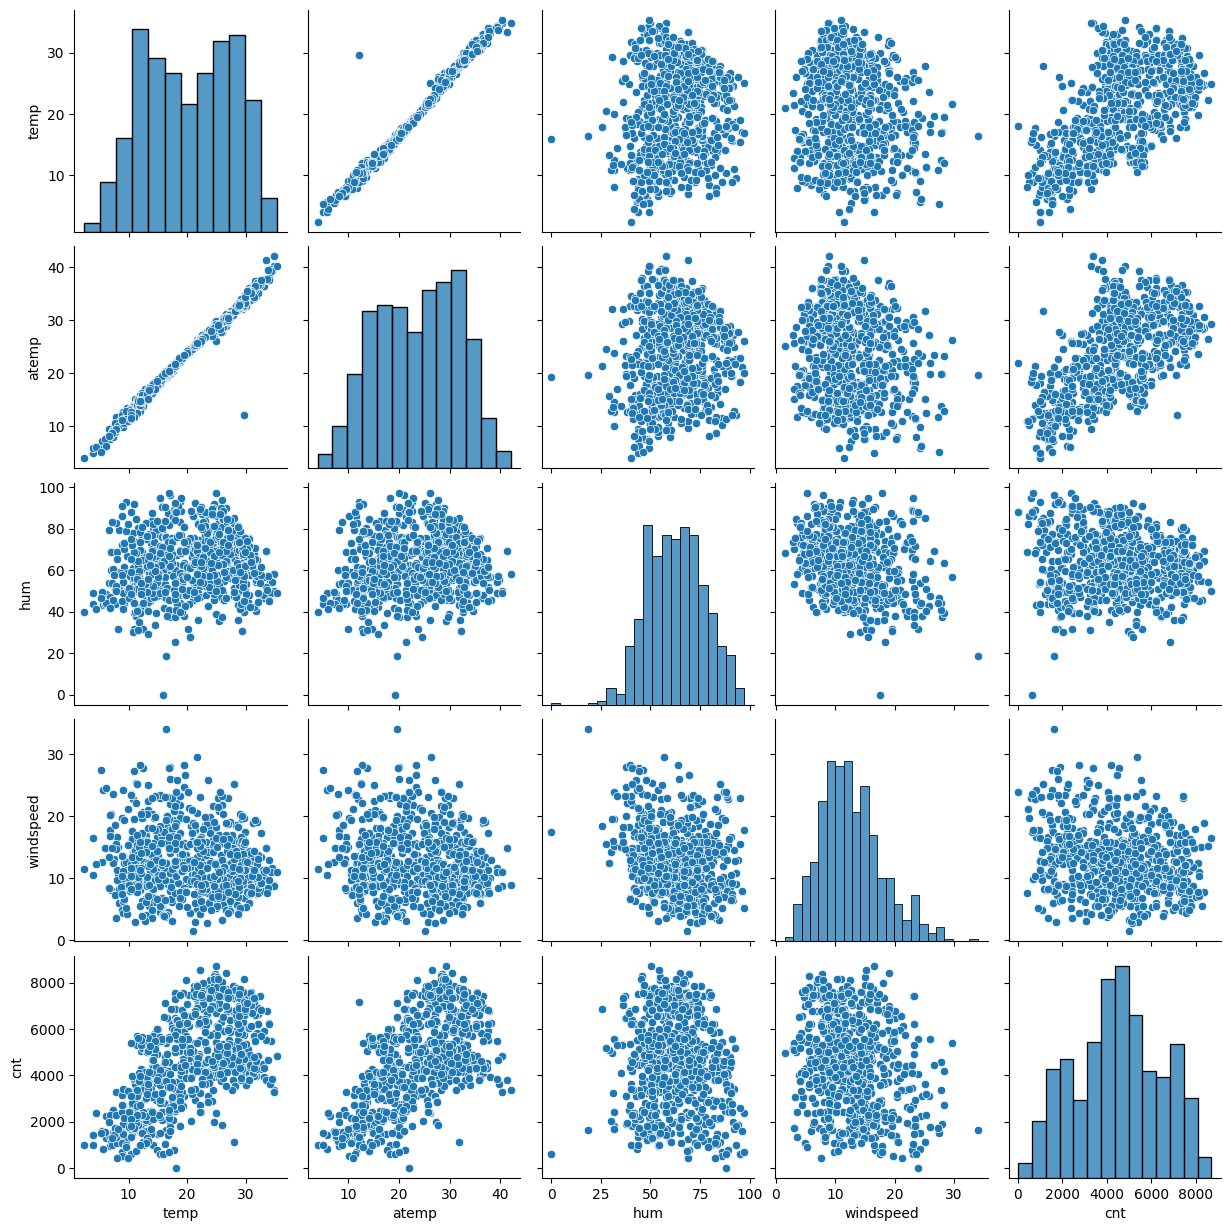

In [13]:
sns.pairplot(data=df, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt']);
plt.show()

Checking the Multicollinearity

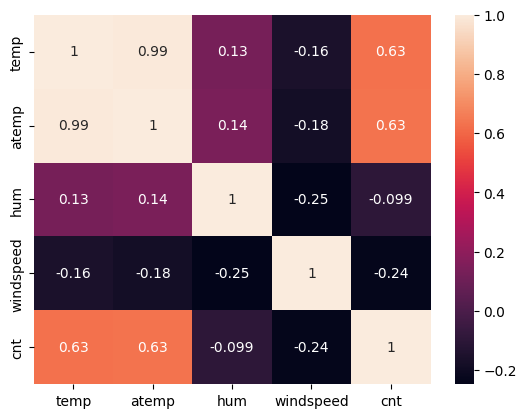

In [14]:
corr_matrix = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(data=corr_matrix, annot=True);

Here in the heatmap, there is a collinearity between `temp` and `atemp`

### Visiualizing categorical data

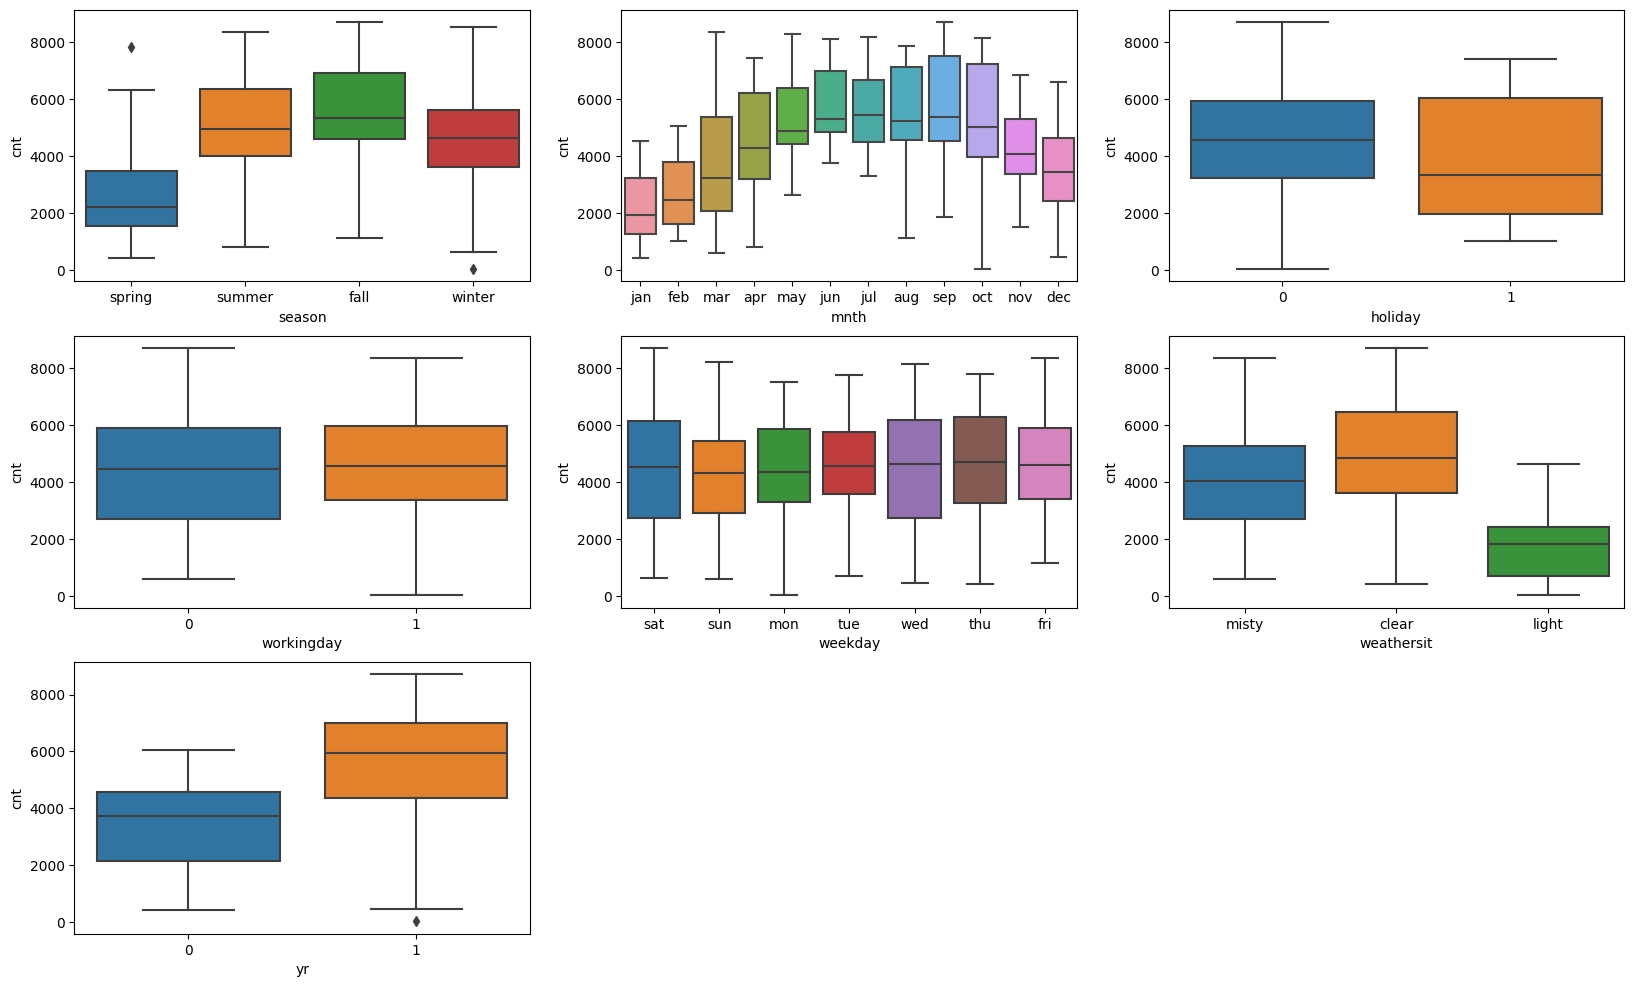

In [15]:
plt.figure(figsize=(20, 12))


plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=df)


plt.subplot(3, 3, 2)
sns.boxplot(x='mnth', y='cnt', data=df)


plt.subplot(3, 3, 3)
sns.boxplot(x='holiday', y='cnt', data=df)


plt.subplot(3, 3, 4)
sns.boxplot(x='workingday', y='cnt', data=df)


plt.subplot(3, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=df)


plt.subplot(3, 3, 6)
sns.boxplot(x='weathersit', y='cnt', data=df)


plt.subplot(3, 3, 7)
sns.boxplot(x='yr', y='cnt', data=df)

plt.show()

# 4. Creating dummies

In [16]:
season_dummy = pd.get_dummies(df['season'], drop_first=True)
mnth_dummy = pd.get_dummies(df['mnth'], drop_first=True)
weathersit_dummy = pd.get_dummies(df['weathersit'], drop_first=True)
weekday_dummy = pd.get_dummies(df['weekday'], drop_first=True)

In [17]:
# Merging all dummy datasets
df = pd.concat([df,season_dummy,mnth_dummy,weathersit_dummy,weekday_dummy],axis=1)

In [18]:
# Removing irrelevant columns as their dummies are created
df = df.drop(['season','mnth','weekday','weathersit'], axis = 1)

In [19]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,light,misty,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


# Splitting into train and test sets

In [20]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [21]:
df_train.shape

(510, 30)

In [22]:
df_test.shape

(220, 30)

### Scaling features

In [23]:
scaler = MinMaxScaler()

In [24]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [25]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,light,misty,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.029412,0.345098,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.169124,0.475867,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


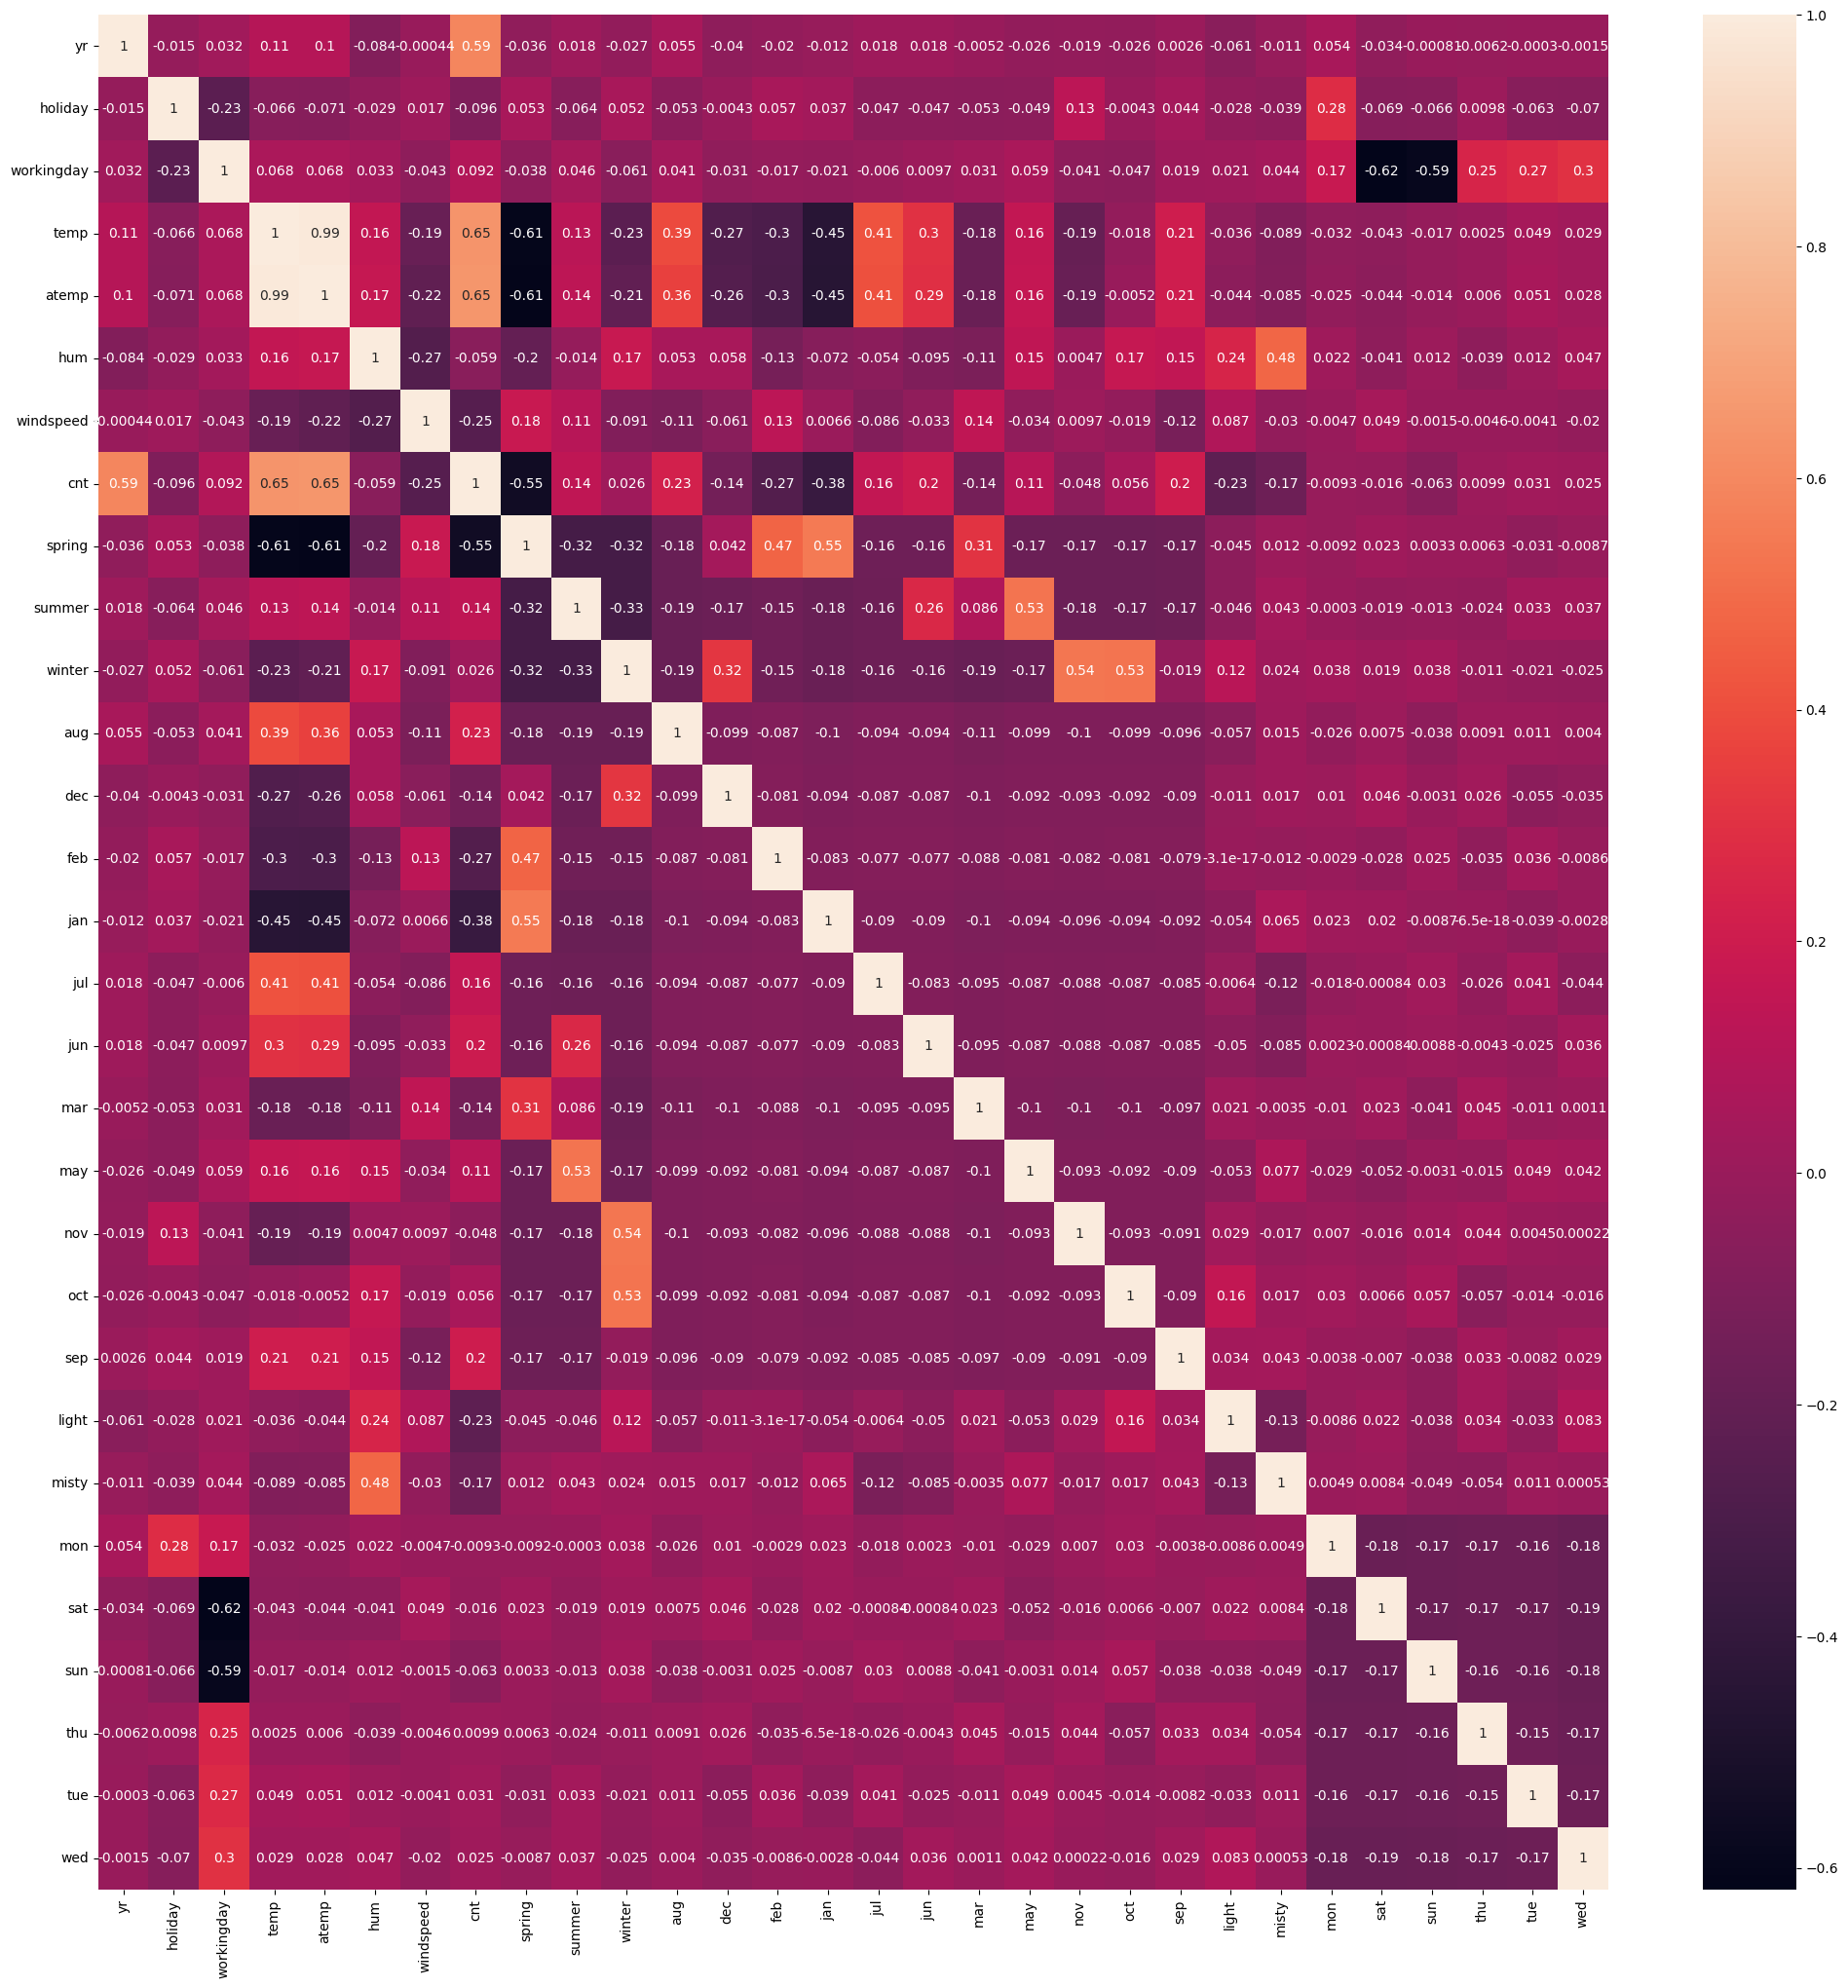

In [26]:
# check the correlation after scaling

plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

Here columns... 

`cnt-temp`, `cnt-yr`, `jan-spring`, `nov-winter`, `oct-winter` are showing some sort of corelation.


# Feature Selection

- We will use a hyrid approach to select our features

    ### Using RFE

In [27]:
# Linear model build

y_train = df_train.pop('cnt')
X_train = df_train

In [28]:
# RFE

lm = LinearRegression()
lm.fit(X_train, y_train)


# Using 17 features as we can take any number of features from 10 to 20 for RFE
rfe = rfe = RFE(estimator=lm, n_features_to_select=17)
rfe = rfe.fit(X_train, y_train)

In [29]:
rfe_supp_cols = X_train.columns[rfe.support_]
rfe_supp_cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'light', 'misty',
       'sat'],
      dtype='object')

In [30]:
# function for calculating RFE

def getVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [31]:
# dataframe with RFE supported variables

X_train_rfe = X_train[rfe_supp_cols]

In [32]:
getVIF(X_train_rfe)

,Features,VIF
4,hum,31.11
3,temp,19.14
2,workingday,5.37
5,windspeed,4.78
6,spring,4.57
8,winter,4.12
7,summer,2.89
15,misty,2.32
0,yr,2.09
16,sat,2.00


VIF for `humidity`, `temp` and `workingday` is greater than 5

### Building models using statsmodels

In [33]:
# First linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          2.52e-190
Time:                        11:02:52   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2756      0.037      7.433      0.0

In [34]:
# holiday exceedes 0.05 so dropping it
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
getVIF(X_train_new)

,Features,VIF
3,hum,31.08
2,temp,18.94
1,workingday,4.77
4,windspeed,4.77
5,spring,4.50
7,winter,4.11
6,summer,2.88
14,misty,2.32
0,yr,2.09
15,sat,1.86


In [35]:
# Second linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.20e-190
Time:                        11:02:52   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2690      0.037      7.267      0.0

In [36]:
# humidity has high VIF so dropping it
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
getVIF(X_train_new)

,Features,VIF
2,temp,6.92
1,workingday,4.74
3,windspeed,4.71
4,spring,3.09
6,winter,3.03
5,summer,2.33
0,yr,2.08
14,sat,1.86
10,nov,1.79
8,jan,1.67


In [37]:
# Third linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.84e-188
Time:                        11:02:52   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1985      0.033      6.031      0.0

In [38]:
# temp has high VIF so dropping it
X_train_new = X_train_new.drop(['temp'], axis = 1)

# Run the function to calculate VIF for the new model
getVIF(X_train_new)

,Features,VIF
2,windspeed,4.26
1,workingday,3.56
3,spring,3.03
5,winter,3.01
4,summer,2.27
0,yr,1.91
9,nov,1.78
7,jan,1.64
13,sat,1.63
12,misty,1.57


In [39]:
# Fourth linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.3
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.73e-161
Time:                        11:02:52   Log-Likelihood:                 446.27
No. Observations:                 510   AIC:                            -862.5
Df Residuals:                     495   BIC:                            -799.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5452      0.019     28.928      0.0

In [40]:
# jul has high VIF so dropping it
X_train_new = X_train_new.drop(['jul'], axis = 1)

# Run the function to calculate VIF for the new model
getVIF(X_train_new)

,Features,VIF
2,windspeed,4.08
1,workingday,3.31
5,winter,2.84
3,spring,2.77
4,summer,2.00
0,yr,1.88
8,nov,1.78
7,jan,1.64
11,misty,1.57
12,sat,1.57


In [41]:
# Fifth linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.2
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.80e-162
Time:                        11:02:52   Log-Likelihood:                 446.00
No. Observations:                 510   AIC:                            -864.0
Df Residuals:                     496   BIC:                            -804.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5395      0.017     31.606      0.0

In [42]:
# winter has high VIF so dropping it
X_train_new = X_train_new.drop(['winter'], axis = 1)

# Run the function to calculate VIF for the new model
getVIF(X_train_new)

,Features,VIF
2,windspeed,3.92
1,workingday,3.21
3,spring,2.38
0,yr,1.87
4,summer,1.79
6,jan,1.63
10,misty,1.54
11,sat,1.54
7,nov,1.22
8,sep,1.20


In [43]:
# Sixth linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.7
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          2.00e-163
Time:                        11:02:52   Log-Likelihood:                 445.62
No. Observations:                 510   AIC:                            -865.2
Df Residuals:                     497   BIC:                            -810.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5348      0.016     33.009      0.0

P values and VIF for all the columns are in acceptable range

# Evaluation

In [44]:
X_train_lm_6.head()

,const,yr,workingday,windspeed,spring,summer,dec,jan,nov,sep,light,misty,sat
576,1.0,1,1,0.264686,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.255342,1,0,0,0,0,0,0,1,1
728,1.0,1,0,0.663106,1,0,1,0,0,0,0,0,0
482,1.0,1,0,0.188475,0,1,0,0,0,0,0,1,1
111,1.0,0,1,0.380981,0,1,0,0,0,0,0,1,0


In [45]:
y_train_pred = lr_6.predict(X_train_lm_6)

/var/folders/_v/09g1kf1j0jb3zr1vpnlqr06m0000gn/T/ipykernel_1386/3536760436.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

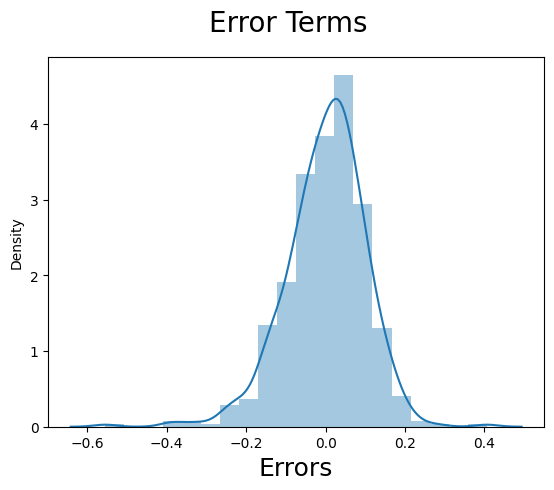

In [46]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### Checking multicllinearity

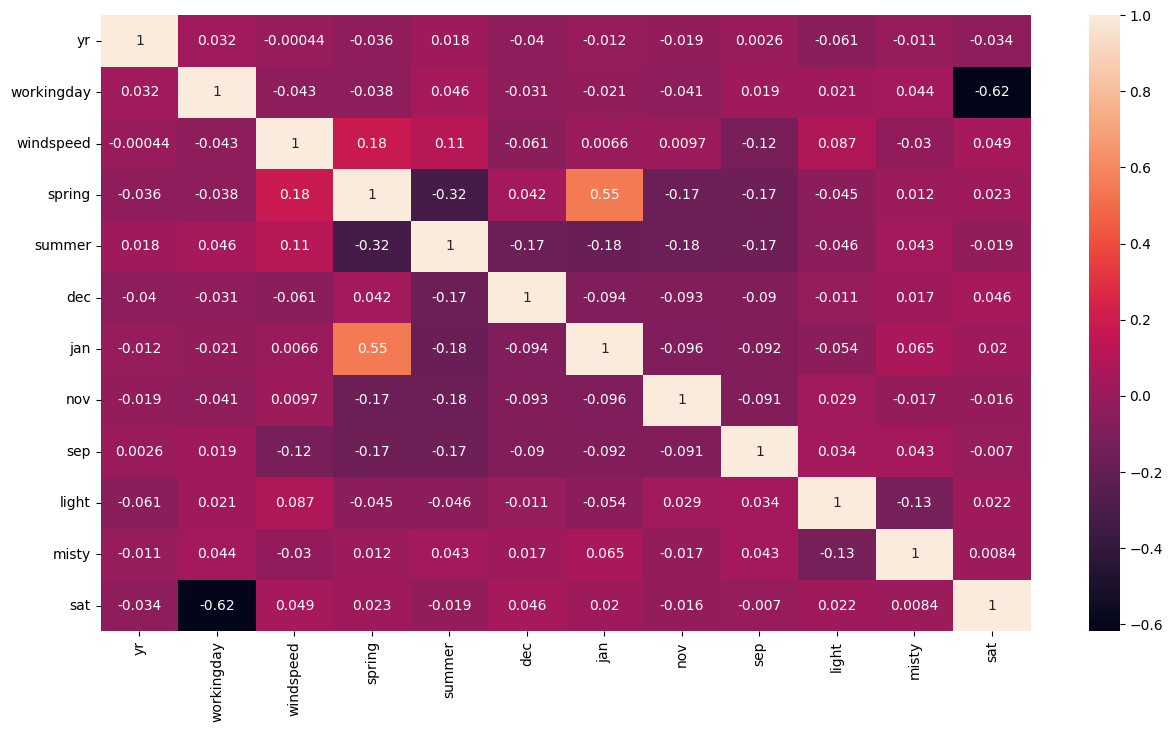

In [47]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True)
plt.show()

> No multicollinearity

### Checking Homoscedasticity

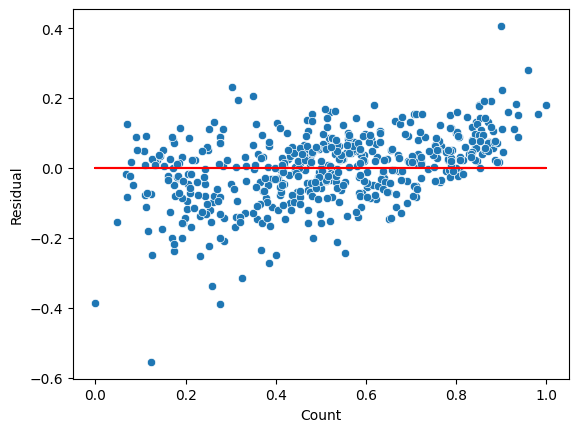

In [48]:

y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred

sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train, (y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

> No pattern appeared

### Making Predictions

In [49]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,light,misty,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,1,0,0


In [50]:
y_test = df_test.pop('cnt')
X_test = df_test

In [51]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [52]:
y_pred = lr_6.predict(X_test_lm_6)

In [53]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7852

Text(0, 0.5, 'y_pred')

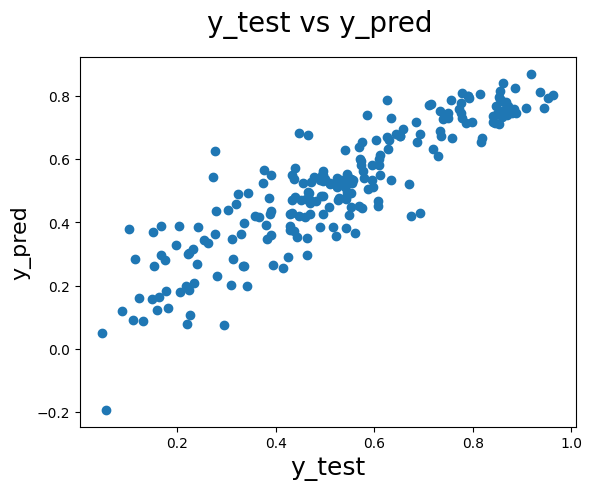

In [54]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [55]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7728


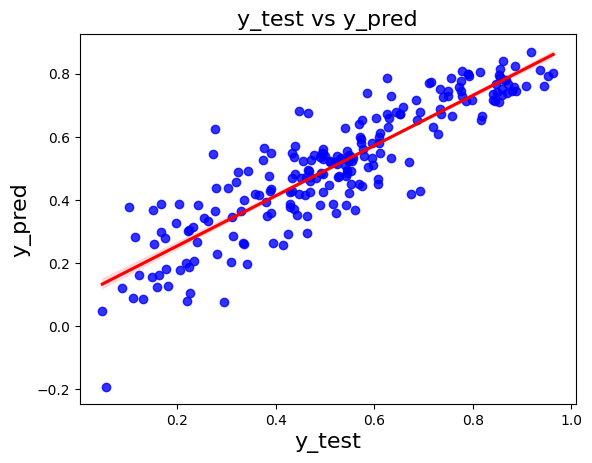

In [56]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=16)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Conclusion

- `yr`, `workingday`, `windspeed`, `spring`, `summer`, `dec`, `jan`, `nov`, `sep`, `light`, `misty`, `sat` are the variables on which demand depends

- Training set R-sq and adjusted R-sq is 0.797 and 0.792
- Testing set R-sq and adjusted R-sq is 0.785 and 0.772

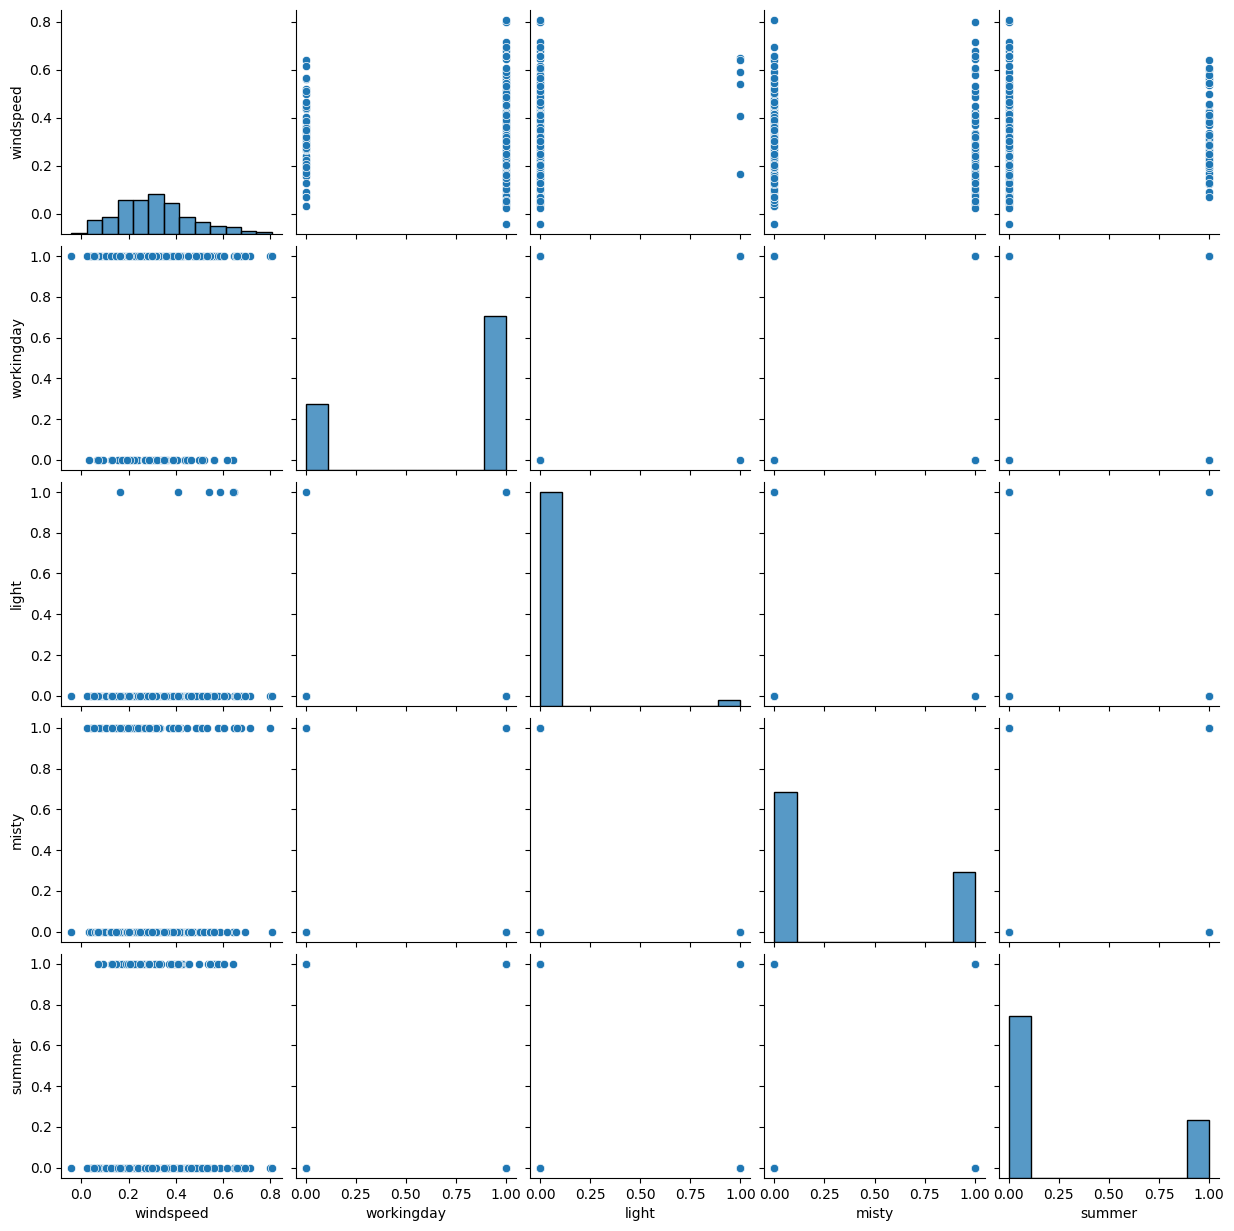